In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv(r'C:\Users\User\Downloads\weight-height.csv')

In [3]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
# Lower limit = Mean-(3*SD)
# Upper limit = Mean+(3*SD)

In [5]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df1['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [7]:
df1['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [8]:
df1['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [47]:
from matplotlib import pyplot as plt

(array([  5.,  10.,  14.,  28.,  42.,  80., 104., 162., 254., 306., 423.,
        474., 513., 570., 566., 626., 550., 619., 562., 611., 569., 547.,
        487., 414., 372., 354., 242., 164., 125.,  90.,  49.,  25.,  21.,
         14.,   8.]),
 array([54.82, 55.48, 56.14, 56.8 , 57.46, 58.12, 58.78, 59.44, 60.1 ,
        60.76, 61.42, 62.08, 62.74, 63.4 , 64.06, 64.72, 65.38, 66.04,
        66.7 , 67.36, 68.02, 68.68, 69.34, 70.  , 70.66, 71.32, 71.98,
        72.64, 73.3 , 73.96, 74.62, 75.28, 75.94, 76.6 , 77.26, 77.92]),
 <BarContainer object of 35 artists>)

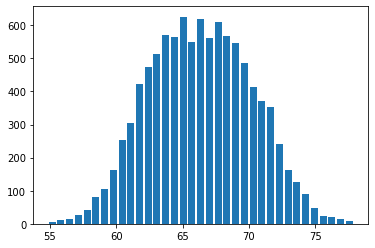

In [48]:
plt.hist(df1['Height'],bins=35,rwidth=0.80)

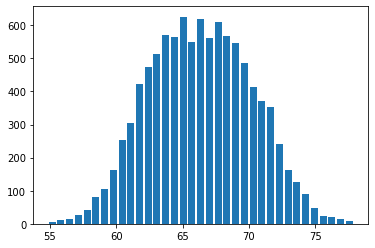

In [49]:
plt.hist(df1['Height'],bins=35,rwidth=0.80)
plt.show()

In [50]:
df1['Height'].skew()

0.047821458873218835

## Mean-SD Method

In [9]:
m=df1['Height'].mean()

In [10]:
m

66.36755975482106

In [11]:
m=np.round(m,2)

In [12]:
m

66.37

In [13]:
sd=df1['Height'].std()

In [14]:
sd

3.8475281207732324

In [16]:
sd=np.round(sd,2)

In [17]:
sd

3.85

In [18]:
lower=m-(3*sd)

In [19]:
lower

54.82000000000001

In [20]:
upper=m+(3*sd)

In [21]:
upper

77.92

In [23]:
df1['Height']<lower

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [24]:
df1[df1['Height']<lower]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [25]:
df1[df1['Height']>upper]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [26]:
(df1['Height']<lower) | (df1['Height']>upper)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [27]:
df1[(df1['Height']<lower) | (df1['Height']>upper)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


## Trimming the outliers

In [28]:
df2=df1[(df1['Height']>lower) & (df1['Height']<upper)]

In [29]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [30]:
df1.shape

(10000, 3)

In [31]:
df2.shape

(9993, 3)

## Capping the outliers

In [33]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [34]:
df1.shape

(10000, 3)

In [35]:
df1['Height']=df1['Height'].map(lambda x:upper if x>upper else (lower if x<lower else x))

In [36]:
df1.shape

(10000, 3)

In [37]:
df1['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [38]:
df1[(df1['Height']<lower) | (df1['Height']>upper)] # No outliers

,Gender,Height,Weight
